# Installation && Spark Session Creation

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!wget https://dlcdn.apache.org/spark/spark-3.5.1/spark-3.5.1-bin-hadoop3.tgz

--2024-06-06 11:11:25--  https://dlcdn.apache.org/spark/spark-3.5.1/spark-3.5.1-bin-hadoop3.tgz
Resolving dlcdn.apache.org (dlcdn.apache.org)... 151.101.2.132, 2a04:4e42::644
Connecting to dlcdn.apache.org (dlcdn.apache.org)|151.101.2.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 400446614 (382M) [application/x-gzip]
Saving to: ‘spark-3.5.1-bin-hadoop3.tgz’

spark-3.5.1-bin-had 100%[===================>] 381.90M   237MB/s    in 1.6s    

2024-06-06 11:11:27 (237 MB/s) - ‘spark-3.5.1-bin-hadoop3.tgz’ saved [400446614/400446614]



In [ ]:
!tar xvzf spark-3.5.1-bin-hadoop3.tgz

spark-3.5.1-bin-hadoop3/
spark-3.5.1-bin-hadoop3/sbin/
spark-3.5.1-bin-hadoop3/sbin/spark-config.sh
spark-3.5.1-bin-hadoop3/sbin/stop-slave.sh
spark-3.5.1-bin-hadoop3/sbin/stop-mesos-dispatcher.sh
spark-3.5.1-bin-hadoop3/sbin/start-workers.sh
spark-3.5.1-bin-hadoop3/sbin/start-slaves.sh
spark-3.5.1-bin-hadoop3/sbin/start-all.sh
spark-3.5.1-bin-hadoop3/sbin/stop-all.sh
spark-3.5.1-bin-hadoop3/sbin/workers.sh
spark-3.5.1-bin-hadoop3/sbin/start-mesos-dispatcher.sh
spark-3.5.1-bin-hadoop3/sbin/spark-daemon.sh
spark-3.5.1-bin-hadoop3/sbin/decommission-worker.sh
spark-3.5.1-bin-hadoop3/sbin/slaves.sh
spark-3.5.1-bin-hadoop3/sbin/stop-mesos-shuffle-service.sh
spark-3.5.1-bin-hadoop3/sbin/stop-history-server.sh
spark-3.5.1-bin-hadoop3/sbin/stop-worker.sh
spark-3.5.1-bin-hadoop3/sbin/decommission-slave.sh
spark-3.5.1-bin-hadoop3/sbin/stop-thriftserver.sh
spark-3.5.1-bin-hadoop3/sbin/start-worker.sh
spark-3.5.1-bin-hadoop3/sbin/stop-slaves.sh
spark-3.5.1-bin-hadoop3/sbin/start-connect-server.sh


In [ ]:
!ls /content/spark-3.5.1-bin-hadoop3

bin   data	jars	    LICENSE   NOTICE  R		 RELEASE  yarn
conf  examples	kubernetes  licenses  python  README.md  sbin


In [ ]:
!pip install findspark

In [ ]:
import os
os.environ["SPARK_HOME"] = "/content/spark-3.5.1-bin-hadoop3"

In [ ]:
import findspark
findspark.init()

In [ ]:
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.0/317.0 MB 1.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.1-py2.py3-none-any.whl size=317488491 sha256=0f54e1f3d555942207a0d91969019ab7e4720da2fd474839982b43ea8b6018f6
  Stored in directory: /root/.cache/pip/wheels/80/1d/60/2c256ed38dddce2fdd93be545214a63e02fbd8d74fb0b7f3a6
Successfully built pyspark


In [ ]:
from pyspark.sql import SparkSession as sc
spark = sc.builder.appName("PySpark 3.3 on google colab").getOrCreate()

# Dataset Load

In [ ]:
data_path = "/content/drive/MyDrive/DIU/Final Semester/Big data and IOT/project/Untitled folder/RT_IOT2022.csv"
data = spark.read.option("header", "true").csv(data_path)
data.show()

+---+---------+---------+-----+-------+------------------+------------+------------+-----------------+-----------------+-------------------+-------------------+------------------+-------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+------------------+------------------+-------------------+------------------+------------------+-------------------+-------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+---------------------+---------------------+---------------------+---------------------+---------------------+-----------------+------------------+------------------+--------------+---------------+-----------------+--------------+------------------+------------------+-------------

# Visualization

In [ ]:
num_columns = len(data.columns)
print("Number of columns:", num_columns)
num_rows = data.count()
print("Number of rows:", num_rows)

Number of columns: 85
Number of rows: 123117


In [ ]:
unique_attack_types = data.select("Attack_type").distinct().collect()
for row in unique_attack_types:
    print(row["Attack_type"])

ARP_poisioning
DOS_SYN_Hping
Thing_Speak
Wipro_bulb
MQTT_Publish
DDOS_Slowloris
NMAP_UDP_SCAN
NMAP_XMAS_TREE_SCAN
NMAP_TCP_scan
NMAP_FIN_SCAN
Metasploit_Brute_Force_SSH
NMAP_OS_DETECTION


# Data Preprocessing

In [ ]:
data=data.drop('no')
data.show()

+---------+---------+-----+-------+------------------+------------+------------+-----------------+-----------------+-------------------+-------------------+------------------+-------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+------------------+------------------+-------------------+------------------+------------------+-------------------+-------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+---------------------+---------------------+---------------------+---------------------+---------------------+-----------------+------------------+------------------+--------------+---------------+-----------------+--------------+------------------+------------------+-----------------

In [ ]:
data.printSchema()

root
 |-- id.orig_p: string (nullable = true)
 |-- id.resp_p: string (nullable = true)
 |-- proto: string (nullable = true)
 |-- service: string (nullable = true)
 |-- flow_duration: string (nullable = true)
 |-- fwd_pkts_tot: string (nullable = true)
 |-- bwd_pkts_tot: string (nullable = true)
 |-- fwd_data_pkts_tot: string (nullable = true)
 |-- bwd_data_pkts_tot: string (nullable = true)
 |-- fwd_pkts_per_sec: string (nullable = true)
 |-- bwd_pkts_per_sec: string (nullable = true)
 |-- flow_pkts_per_sec: string (nullable = true)
 |-- down_up_ratio: string (nullable = true)
 |-- fwd_header_size_tot: string (nullable = true)
 |-- fwd_header_size_min: string (nullable = true)
 |-- fwd_header_size_max: string (nullable = true)
 |-- bwd_header_size_tot: string (nullable = true)
 |-- bwd_header_size_min: string (nullable = true)
 |-- bwd_header_size_max: string (nullable = true)
 |-- flow_FIN_flag_count: string (nullable = true)
 |-- flow_SYN_flag_count: string (nullable = true)
 |-- flo

In [ ]:
from pyspark.sql.functions import col
from pyspark.sql.types import StringType, IntegerType, DoubleType
string_columns = ["proto", "service", "Attack_type"]
integer_columns = [
    "id.orig_p", "id.resp_p", "fwd_pkts_tot", "bwd_pkts_tot", "fwd_data_pkts_tot",
    "bwd_data_pkts_tot", "fwd_header_size_tot", "fwd_header_size_min", "fwd_header_size_max",
    "bwd_header_size_tot", "bwd_header_size_min", "bwd_header_size_max", "flow_FIN_flag_count",
    "flow_SYN_flag_count", "flow_RST_flag_count", "fwd_PSH_flag_count", "bwd_PSH_flag_count",
    "flow_ACK_flag_count", "fwd_URG_flag_count", "bwd_URG_flag_count", "flow_CWR_flag_count",
    "flow_ECE_flag_count", "fwd_init_window_size", "bwd_init_window_size", "fwd_last_window_size"
]
double_columns = [
    "flow_duration", "fwd_pkts_per_sec", "bwd_pkts_per_sec", "flow_pkts_per_sec", "down_up_ratio",
    "fwd_pkts_payload.min", "fwd_pkts_payload.max", "fwd_pkts_payload.tot", "fwd_pkts_payload.avg",
    "fwd_pkts_payload.std", "bwd_pkts_payload.min", "bwd_pkts_payload.max", "bwd_pkts_payload.tot",
    "bwd_pkts_payload.avg", "bwd_pkts_payload.std", "flow_pkts_payload.min", "flow_pkts_payload.max",
    "flow_pkts_payload.tot", "flow_pkts_payload.avg", "flow_pkts_payload.std", "fwd_iat.min",
    "fwd_iat.max", "fwd_iat.tot", "fwd_iat.avg", "fwd_iat.std", "bwd_iat.min", "bwd_iat.max",
    "bwd_iat.tot", "bwd_iat.avg", "bwd_iat.std", "flow_iat.min", "flow_iat.max", "flow_iat.tot",
    "flow_iat.avg", "flow_iat.std", "payload_bytes_per_second", "fwd_bulk_rate", "bwd_bulk_rate",
    "active.min", "active.max", "active.tot", "active.avg", "active.std", "idle.min", "idle.max",
    "idle.tot", "idle.avg", "idle.std", "fwd_subflow_pkts", "bwd_subflow_pkts", "fwd_subflow_bytes",
    "bwd_subflow_bytes", "fwd_bulk_bytes", "bwd_bulk_bytes", "fwd_bulk_packets", "bwd_bulk_packets"
]
for col_name in string_columns:
    data = data.withColumn(col_name, col(f"`{col_name}`").cast(StringType()))

for col_name in integer_columns:
    data = data.withColumn(col_name, col(f"`{col_name}`").cast(IntegerType()))

for col_name in double_columns:
    data = data.withColumn(col_name, col(f"`{col_name}`").cast(DoubleType()))
data.printSchema()


root
 |-- id.orig_p: integer (nullable = true)
 |-- id.resp_p: integer (nullable = true)
 |-- proto: string (nullable = true)
 |-- service: string (nullable = true)
 |-- flow_duration: double (nullable = true)
 |-- fwd_pkts_tot: integer (nullable = true)
 |-- bwd_pkts_tot: integer (nullable = true)
 |-- fwd_data_pkts_tot: integer (nullable = true)
 |-- bwd_data_pkts_tot: integer (nullable = true)
 |-- fwd_pkts_per_sec: double (nullable = true)
 |-- bwd_pkts_per_sec: double (nullable = true)
 |-- flow_pkts_per_sec: double (nullable = true)
 |-- down_up_ratio: double (nullable = true)
 |-- fwd_header_size_tot: integer (nullable = true)
 |-- fwd_header_size_min: integer (nullable = true)
 |-- fwd_header_size_max: integer (nullable = true)
 |-- bwd_header_size_tot: integer (nullable = true)
 |-- bwd_header_size_min: integer (nullable = true)
 |-- bwd_header_size_max: integer (nullable = true)
 |-- flow_FIN_flag_count: integer (nullable = true)
 |-- flow_SYN_flag_count: integer (nullable = 

In [ ]:
schema = data.schema
num_double_columns = 0
num_integer_columns = 0
num_string_columns = 0
for field in schema.fields:
    if field.dataType == StringType():
        num_string_columns += 1
    elif field.dataType == IntegerType():
        num_integer_columns += 1
    elif field.dataType == DoubleType():
        num_double_columns += 1
print("Number of double columns:", num_double_columns)
print("Number of integer columns:", num_integer_columns)
print("Number of string columns:", num_string_columns)


Number of double columns: 56
Number of integer columns: 25
Number of string columns: 3


In [ ]:
num_columns = len(data.columns)
print("Number of columns:", num_columns)
num_rows = data.count()
print("Number of rows:", num_rows)


Number of columns: 84
Number of rows: 123117


In [ ]:
from pyspark.sql.functions import col
null_counts = {}
for col_name in data.columns:
    null_count = data.where(col(f"`{col_name}`").isNull()).count()
    null_counts[col_name] = null_count
for col_name, count in null_counts.items():
    print(f"Column '{col_name}': {count} null values")

Column 'id.orig_p': 0 null values
Column 'id.resp_p': 0 null values
Column 'proto': 0 null values
Column 'service': 0 null values
Column 'flow_duration': 0 null values
Column 'fwd_pkts_tot': 0 null values
Column 'bwd_pkts_tot': 0 null values
Column 'fwd_data_pkts_tot': 0 null values
Column 'bwd_data_pkts_tot': 0 null values
Column 'fwd_pkts_per_sec': 0 null values
Column 'bwd_pkts_per_sec': 0 null values
Column 'flow_pkts_per_sec': 0 null values
Column 'down_up_ratio': 0 null values
Column 'fwd_header_size_tot': 0 null values
Column 'fwd_header_size_min': 0 null values
Column 'fwd_header_size_max': 0 null values
Column 'bwd_header_size_tot': 0 null values
Column 'bwd_header_size_min': 0 null values
Column 'bwd_header_size_max': 0 null values
Column 'flow_FIN_flag_count': 0 null values
Column 'flow_SYN_flag_count': 0 null values
Column 'flow_RST_flag_count': 0 null values
Column 'fwd_PSH_flag_count': 0 null values
Column 'bwd_PSH_flag_count': 0 null values
Column 'flow_ACK_flag_count': 

In [ ]:
from pyspark.sql.functions import col
from pyspark.ml.feature import StringIndexer
categorical_columns = ["proto", "service", "Attack_type"]
indexers = {}
for col_name in categorical_columns:
    indexer = StringIndexer(inputCol=col_name, outputCol=f"{col_name}_indexed")
    indexers[col_name] = indexer
indexed_data = data
for col_name, indexer in indexers.items():
    indexed_data = indexer.fit(indexed_data).transform(indexed_data)
    indexed_data = indexed_data.drop(col_name)
indexed_data.show(5)

+---------+---------+------------------+------------+------------+-----------------+-----------------+----------------+-------------------+-----------------+-------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+------------------+------------------+-------------------+------------------+------------------+-------------------+-------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+---------------------+---------------------+---------------------+---------------------+---------------------+-----------+-----------------+-----------------+--------------+-----------------+-----------+--------------+------------------+------------------+-----------------+------------+----------------

In [ ]:
indexed_data.printSchema()

root
 |-- id.orig_p: integer (nullable = true)
 |-- id.resp_p: integer (nullable = true)
 |-- flow_duration: double (nullable = true)
 |-- fwd_pkts_tot: integer (nullable = true)
 |-- bwd_pkts_tot: integer (nullable = true)
 |-- fwd_data_pkts_tot: integer (nullable = true)
 |-- bwd_data_pkts_tot: integer (nullable = true)
 |-- fwd_pkts_per_sec: double (nullable = true)
 |-- bwd_pkts_per_sec: double (nullable = true)
 |-- flow_pkts_per_sec: double (nullable = true)
 |-- down_up_ratio: double (nullable = true)
 |-- fwd_header_size_tot: integer (nullable = true)
 |-- fwd_header_size_min: integer (nullable = true)
 |-- fwd_header_size_max: integer (nullable = true)
 |-- bwd_header_size_tot: integer (nullable = true)
 |-- bwd_header_size_min: integer (nullable = true)
 |-- bwd_header_size_max: integer (nullable = true)
 |-- flow_FIN_flag_count: integer (nullable = true)
 |-- flow_SYN_flag_count: integer (nullable = true)
 |-- flow_RST_flag_count: integer (nullable = true)
 |-- fwd_PSH_flag_

In [ ]:
from pyspark.sql import functions as F
def remove_special_characters(name):
    return name.replace('.', '_')
cleaned_columns = [remove_special_characters(col_name) for col_name in indexed_data.columns]
cleanedcolumns = indexed_data.toDF(*cleaned_columns)

In [ ]:
cleanedcolumns.printSchema()

root
 |-- id_orig_p: integer (nullable = true)
 |-- id_resp_p: integer (nullable = true)
 |-- flow_duration: double (nullable = true)
 |-- fwd_pkts_tot: integer (nullable = true)
 |-- bwd_pkts_tot: integer (nullable = true)
 |-- fwd_data_pkts_tot: integer (nullable = true)
 |-- bwd_data_pkts_tot: integer (nullable = true)
 |-- fwd_pkts_per_sec: double (nullable = true)
 |-- bwd_pkts_per_sec: double (nullable = true)
 |-- flow_pkts_per_sec: double (nullable = true)
 |-- down_up_ratio: double (nullable = true)
 |-- fwd_header_size_tot: integer (nullable = true)
 |-- fwd_header_size_min: integer (nullable = true)
 |-- fwd_header_size_max: integer (nullable = true)
 |-- bwd_header_size_tot: integer (nullable = true)
 |-- bwd_header_size_min: integer (nullable = true)
 |-- bwd_header_size_max: integer (nullable = true)
 |-- flow_FIN_flag_count: integer (nullable = true)
 |-- flow_SYN_flag_count: integer (nullable = true)
 |-- flow_RST_flag_count: integer (nullable = true)
 |-- fwd_PSH_flag_

In [ ]:
numerical_columns = [col_name for col_name in cleaned_columns if col_name not in ["Attack_type_indexed", "proto_indexed", "service_indexed"]]
stats = cleanedcolumns.select(
    [F.mean(col_name).alias(f"{col_name}_mean") for col_name in numerical_columns] +
    [F.stddev(col_name).alias(f"{col_name}_stddev") for col_name in numerical_columns]
)
stats_dict = stats.collect()[0].asDict()
for col_name in numerical_columns:
    cleanedcolumns = cleanedcolumns.withColumn(f"{col_name}_mean", F.lit(stats_dict[f"{col_name}_mean"]))
    cleanedcolumns = cleanedcolumns.withColumn(f"{col_name}_stddev", F.lit(stats_dict[f"{col_name}_stddev"]))
# z-scores for each numerical column
for col_name in numerical_columns:
    cleanedcolumns = cleanedcolumns.withColumn(
        f"{col_name}_z_score",
        (F.col(col_name) - F.col(f"{col_name}_mean")) / F.col(f"{col_name}_stddev")
    )


In [ ]:
z_score_threshold = 3
for col_name in numerical_columns:
    cleanedcolumns = cleanedcolumns.filter(
        F.col(f"{col_name}_z_score").isNull() | (F.abs(F.col(f"{col_name}_z_score")) <= z_score_threshold)
    )


In [ ]:
for col_name in numerical_columns:
    cleanedcolumns = cleanedcolumns.drop(f"{col_name}_z_score").drop(f"{col_name}_mean").drop(f"{col_name}_stddev")
cleanedcolumns.show()

+---------+---------+--------------------+------------+------------+-----------------+-----------------+------------------+------------------+------------------+-------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+------------------+------------------+-------------------+------------------+------------------+-------------------+-------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+---------------------+---------------------+---------------------+---------------------+---------------------+------------------+------------------+------------------+------------------+-----------+------------------+------------------+------------------+------------------+-----------+-------------

In [ ]:
from pyspark.sql import functions as F
from pyspark.sql.functions import col
from pyspark.ml.feature import VectorAssembler, StandardScaler
numerical_columns = [col_name for col_name in cleanedcolumns.columns if col_name not in ["Attack_type_indexed"]]

assembler = VectorAssembler(inputCols=numerical_columns, outputCol="features")
assembled_data = assembler.transform(cleanedcolumns)
assembled_data.select("features").show(truncate=False)


scaler = StandardScaler(inputCol="features", outputCol="scaledFeatures")
scaler_model = scaler.fit(assembled_data)
scaled_data = scaler_model.transform(assembled_data)
scaled_data.select("scaledFeatures").show(truncate=False)
scaled_data.select("scaledFeatures", "Attack_type_indexed").show(truncate=False)

+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|features                                                                                                                                                                                                                                                                                                                                                                                           

# Training Different Models

In [ ]:
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.feature import VectorAssembler, StandardScaler
from pyspark.ml import Pipeline

train_data, test_data = scaled_data.randomSplit([0.8, 0.2], seed=1234)

lr = LogisticRegression(featuresCol='scaledFeatures', labelCol='Attack_type_indexed')

pipeline = Pipeline(stages=[lr])

pipeline_model = pipeline.fit(train_data)
predictions = pipeline_model.transform(test_data)

evaluator = MulticlassClassificationEvaluator(labelCol='Attack_type_indexed', metricName='accuracy')
accuracy = evaluator.evaluate(predictions)
print(f"Model Accuracy: {accuracy}")


# Evaluate training data
train_predictions = pipeline_model.transform(train_data)
train_accuracy = evaluator.evaluate(train_predictions)

# Step 8: Evaluate the model on the testing data
test_accuracy = evaluator.evaluate(predictions)


print(f"Training Accuracy: {train_accuracy}")
print(f"Testing Accuracy: {test_accuracy}")



Model Accuracy: 0.9983654099657263
Training Accuracy: 0.9985749722911279
Testing Accuracy: 0.9983654099657263


In [ ]:
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

rf = RandomForestClassifier(featuresCol='scaledFeatures', labelCol='Attack_type_indexed', numTrees=10, maxDepth=5)

rf_model = rf.fit(train_data)

predictions = rf_model.transform(test_data)

evaluator = MulticlassClassificationEvaluator(labelCol='Attack_type_indexed', metricName='accuracy')
accuracy = evaluator.evaluate(predictions)
print(f"Random Forest Model Accuracy: {accuracy}")


Random Forest Model Accuracy: 0.9978908515686792


/content/spark-3.5.1-bin-hadoop3/python/pyspark/sql/context.py:158: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


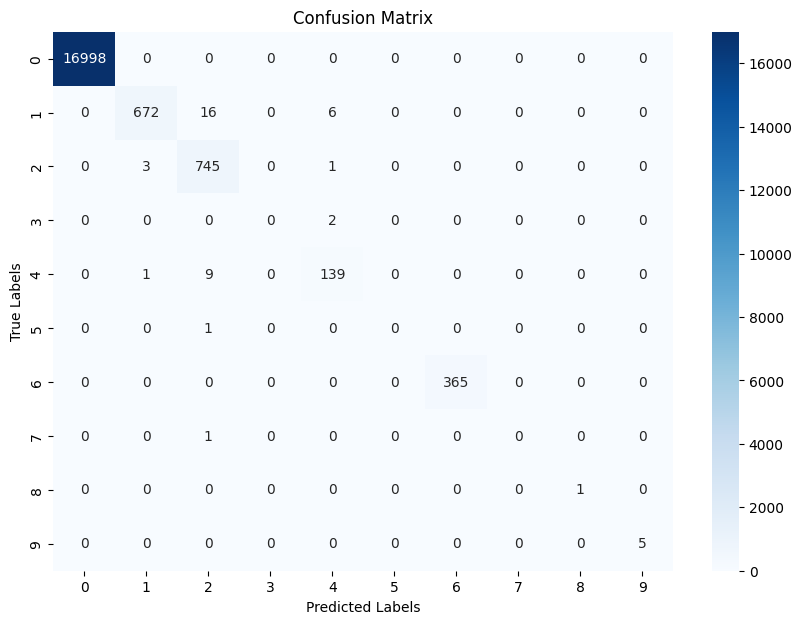

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from pyspark.mllib.evaluation import MulticlassMetrics
from pyspark.sql import SparkSession
# Compute the confusion matrix
prediction_and_labels = predictions.select("prediction", "Attack_type_indexed").rdd
metrics = MulticlassMetrics(prediction_and_labels)
confusion_matrix = metrics.confusionMatrix().toArray()

# Plotting the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix, annot=True, fmt="g", cmap="Blues")

# Adding labels
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")

# Display the plot
plt.show()

In [ ]:
# Calculate the correlation matrix
correlation_matrix = scaled_data.select([F.corr(col_name, 'Attack_type_indexed').alias(col_name)
                                         for col_name in numerical_columns])

# Collect correlation values
correlation_values = correlation_matrix.collect()[0].asDict()

# Print correlation values
for col_name, correlation_value in correlation_values.items():
    print(f"Correlation between {col_name} and Attack_type_indexed: {correlation_value}")


Correlation between id_orig_p and Attack_type_indexed: 0.21933080304053654
Correlation between id_resp_p and Attack_type_indexed: 0.6351026371470988
Correlation between flow_duration and Attack_type_indexed: 0.04419430466276276
Correlation between fwd_pkts_tot and Attack_type_indexed: 0.23412073113462664
Correlation between bwd_pkts_tot and Attack_type_indexed: -0.09753024703026232
Correlation between fwd_data_pkts_tot and Attack_type_indexed: -0.2998267379610937
Correlation between bwd_data_pkts_tot and Attack_type_indexed: 0.23795451738636408
Correlation between fwd_pkts_per_sec and Attack_type_indexed: -0.2626570028658936
Correlation between bwd_pkts_per_sec and Attack_type_indexed: -0.26266735604075236
Correlation between flow_pkts_per_sec and Attack_type_indexed: -0.2626621816021145
Correlation between down_up_ratio and Attack_type_indexed: -0.4375938959822263
Correlation between fwd_header_size_tot and Attack_type_indexed: -0.40677758033126155
Correlation between fwd_header_size_

In [ ]:
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# Define the Decision Tree classifier
dt = DecisionTreeClassifier(featuresCol='scaledFeatures', labelCol='Attack_type_indexed', maxDepth=5)

# Train the Decision Tree model on the training data
dt_model = dt.fit(train_data)

# Make predictions on the test data
predictions = dt_model.transform(test_data)

# Evaluate the model on the test data
evaluator = MulticlassClassificationEvaluator(labelCol='Attack_type_indexed', metricName='accuracy')
accuracy = evaluator.evaluate(predictions)
print(f"Decision Tree Model Accuracy: {accuracy}")


Decision Tree Model Accuracy: 0.9983126812549433


In [ ]:
# Calculate the correlation matrix
correlation_matrix = scaled_data.select([F.corr(col_name, 'Attack_type_indexed').alias(col_name)
                                         for col_name in numerical_columns])

# Show the correlation matrix
correlation_matrix.show(truncate=False)


+-------------------+------------------+-------------------+-------------------+--------------------+-------------------+-------------------+-------------------+--------------------+-------------------+-------------------+--------------------+--------------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+--------------------+--------------------+--------------------+-------------------+------------------+------------------+-------------------+-------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+---------------------+---------------------+---------------------+---------------------+---------------------+--------------------+--------------------+--------------------+--------------------+--------------------+-------------------+----------

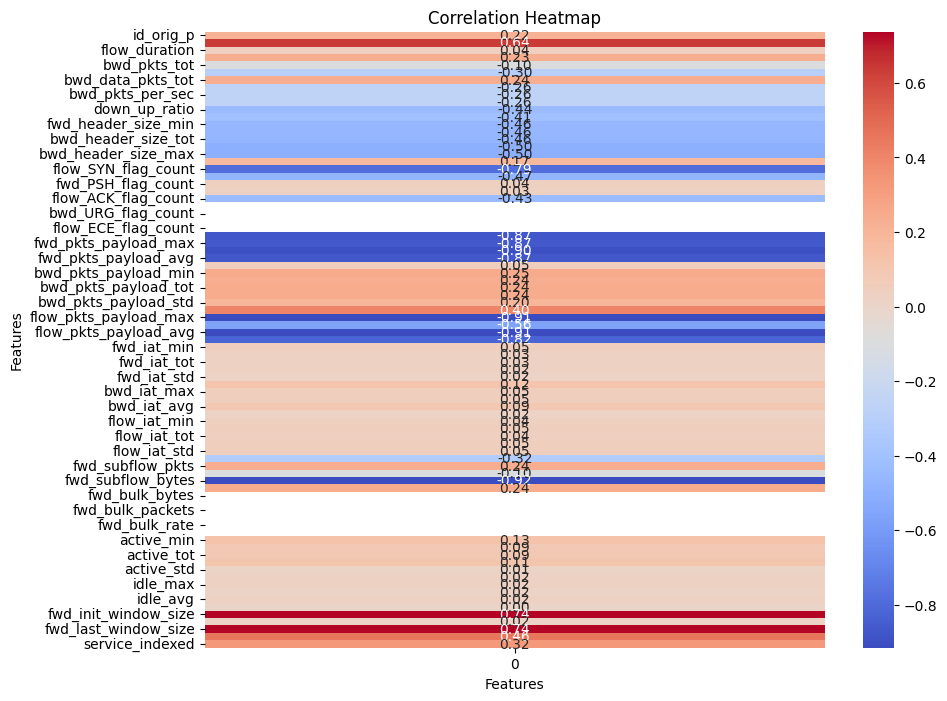

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert correlation matrix to Pandas DataFrame for visualization
correlation_df = correlation_matrix.toPandas().transpose()

# Set figure size
plt.figure(figsize=(10, 8))

# Create heatmap
sns.heatmap(correlation_df, annot=True, cmap='coolwarm', fmt=".2f")

# Set title and labels
plt.title('Correlation Heatmap')
plt.xlabel('Features')
plt.ylabel('Features')

# Show plot
plt.show()
